In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dimensionality Reduction (차원 축소)
### (1)  주성분 분석 (PCA)
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA
- PCA 등의 차원 축소 기법들을 이용하여 데이터를 시각화하거나 고차원 데이터의 변수 수를 줄여 지도 학습이 잘 되도록 만들 수 있습니다.
- 앞의 다른 전처리기법들과 같이 training 데이터에 대해서 fit 및 transform, 나머지 validation, test 데이터에 대해서는 transform 을 해주어야 합니다.

#### A. PCA를 적용해 유방암 데이터셋을 시각화해봅시다

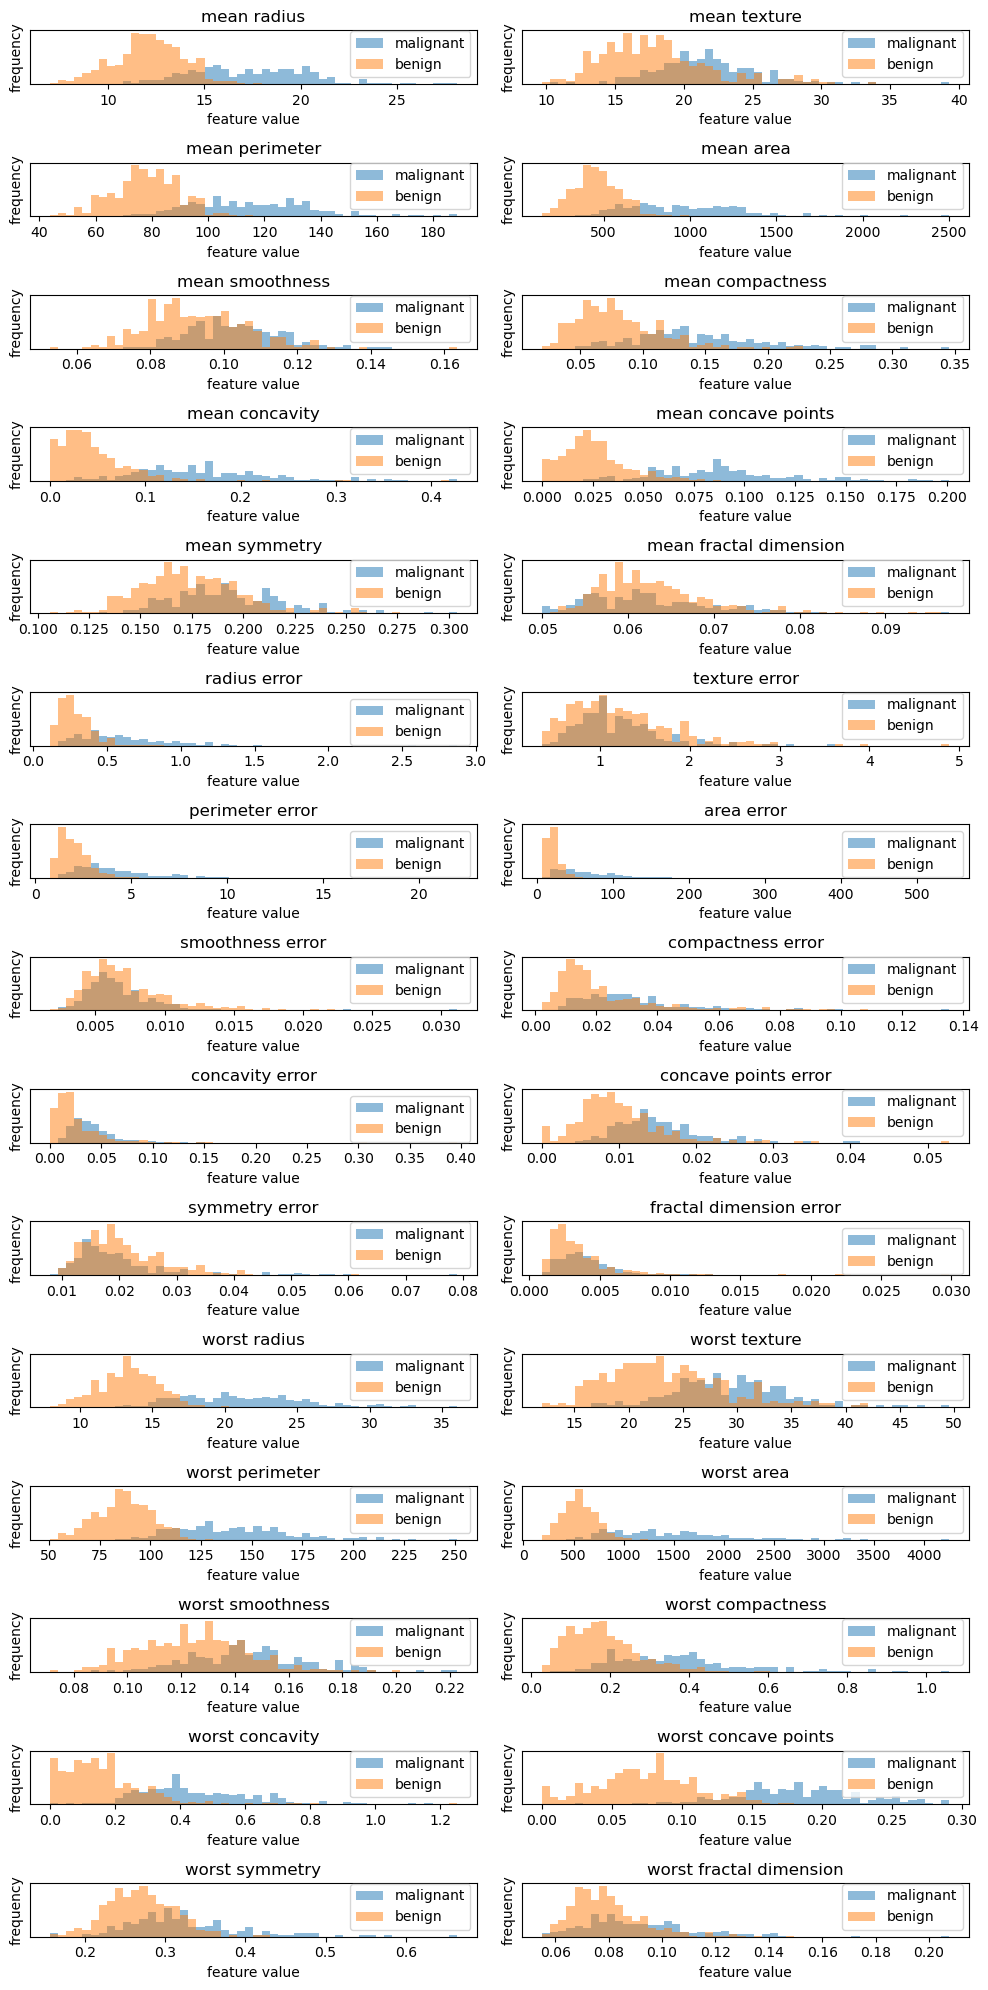

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# 차원 축소 없이 각 변수별 시각화
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("feature value")
    ax[i].set_ylabel("frequency")
    ax[i].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [3]:
from sklearn.preprocessing import StandardScaler

# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [4]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


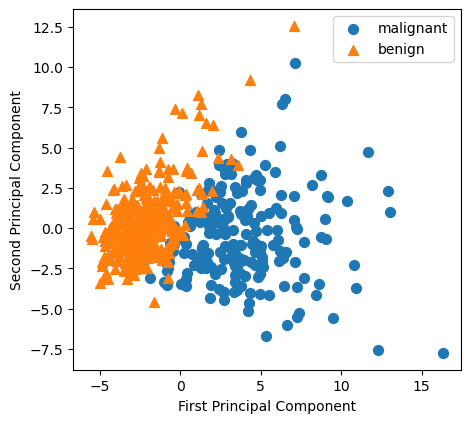

In [5]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(5, 5))
# mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.scatter(X_pca[np.where(cancer.target==0),0],X_pca[np.where(cancer.target==0),1],marker='o',s=50)
plt.scatter(X_pca[np.where(cancer.target==1),0],X_pca[np.where(cancer.target==1),1],marker='^',s=50)

plt.legend(["malignant", "benign"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show() 

In [6]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [7]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


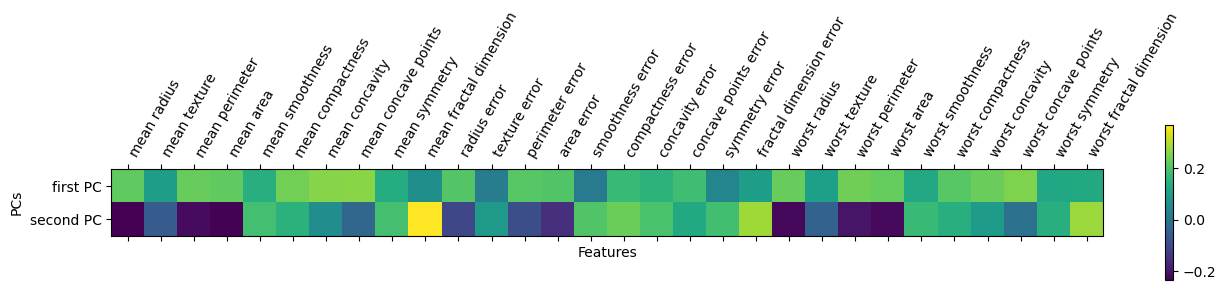

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first PC", "second PC"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Features")
plt.ylabel("PCs")
plt.show() 


#### B. PCA를 적용해 유방암 데이터셋에 대한 분류 분석을 진행해봅시다.


In [9]:
# PCA 없이 logistic regression 적용하여 정확도 비교

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
                                                    
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(lr.score(X_test_scaled, y_test)))


스케일 조정된 테스트 세트의 정확도: 0.96


In [19]:
# PCA 후 logistic regression 적용하여 정확도 비교 (서로 다른 # of PC 사용)

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_train_scaled)
X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

lr = LogisticRegression()
lr.fit(X_pca_train, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(lr.score(X_pca_test, y_test)))


스케일 조정된 테스트 세트의 정확도: 0.97


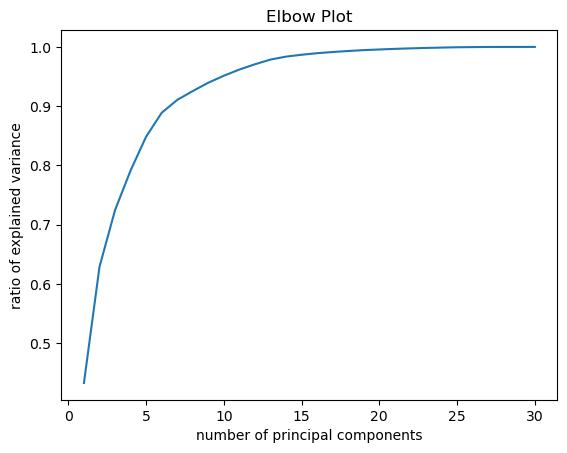

In [11]:
pca = PCA()
pca.fit(X_train_scaled)
r = pca.explained_variance_ratio_

ratio_sum = [sum(r[:i]) for i in range(1,31)]
plt.plot(range(1,31),ratio_sum)
plt.xlabel('number of principal components')
plt.ylabel('ratio of explained variance')
plt.title('Elbow Plot')
plt.show()